Insurance Prediction Nigerian Problem_Challenge

🔍 Overview:
This challenge aimed to predict whether a customer would file an insurance claim based on property and demographic data. Participants worked with real-world Nigerian data, tackling issues like missing values, symbolic features, and class imbalance. The goal was to build accurate, interpretable models to support smarter insurance decisions in Nigeria’s emerging data ecosystem.

Steps to deals with in this challenge

1.Understand the Problem – Define the goal: predict insurance claims.  
2.Load & Inspect Data – Check structure, types, and missing values.  
3.Clean Data – Fix missing entries and inconsistent categories.  
4.Feature Engineering– Create meaningful features from raw data.  
5.Encode Variables– Convert categorical features to numeric form.  
6.Handle Imbalance– Apply techniques like SMOTE or class weights.  
7.Split Data– Create train/test sets for evaluation.  
8.Train Models– Use classifiers like XGBoost, LightGBM, etc.  
9.Tune Hyperparameters– Optimize model performance.  
10.Evaluate Results– Use metrics like AUC, F1-score.  
11.Interpret Model– Analyze feature importance and predictions.  

In [53]:
#LOADING THE DEPENDENCY

In [54]:
#loading datasets from the folder

In [55]:
train=pd.read_csv('/content/Insurance Prediction Nigerian Problem_Challenge.ipynb/train_data.csv')
test=pd.read_csv('/content/Insurance Prediction Nigerian Problem_Challenge.ipynb/test_data.csv')
submission=pd.read_csv('/content/Insurance Prediction Nigerian Problem_Challenge.ipynb/SampleSubmission.csv')

In [56]:
train.head(2)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0


In [57]:
test.head(2)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310


In [58]:
submission.head(2)

,Customer Id,Claim
0,H0,1
1,H10000,1


Clean Data – Fix missing entries and inconsistent categories.

In [59]:
train.isnull().mean()*100

,0
Customer Id,0.000000
YearOfObservation,0.000000
Insured_Period,0.000000
Residential,0.000000
Building_Painted,0.000000
Building_Fenced,0.000000
Garden,0.097765
Settlement,0.000000
Building Dimension,1.480447
Building_Type,0.000000


In [60]:
print(train['Garden'],train['Building Dimension'],train['Geo_Code'])

0       V
1       O
2       V
3       V
4       O
       ..
7155    V
7156    V
7157    V
7158    V
7159    V
Name: Garden, Length: 7160, dtype: object 0        290.0
1        490.0
2        595.0
3       2840.0
4        680.0
         ...  
7155       NaN
7156       NaN
7157       NaN
7158       NaN
7159       NaN
Name: Building Dimension, Length: 7160, dtype: float64 0       1053
1       1053
2       1053
3       1053
4       1053
        ... 
7155     NaN
7156     NaN
7157     NaN
7158     NaN
7159     NaN
Name: Geo_Code, Length: 7160, dtype: object


In [61]:
columns = ['Garden', 'Building Dimension', 'Geo_Code', 'Date_of_Occupancy']
for col in columns:
    train[col] = train[col].fillna(train[col].mode()[0])

In [62]:
test.isnull().mean()*100

,0
Customer Id,0.000000
YearOfObservation,0.000000
Insured_Period,0.000000
Residential,0.000000
Building_Painted,0.000000
Building_Fenced,0.000000
Garden,0.130336
Settlement,0.000000
Building Dimension,0.423591
Building_Type,0.000000


In [63]:
test['Garden'],test['Building Dimension'],test['Geo_Code'],test['Date_of_Occupancy']

(0       O
 1       O
 2       V
 3       O
 4       O
        ..
 3064    V
 3065    V
 3066    V
 3067    V
 3068    V
 Name: Garden, Length: 3069, dtype: object,
 0        300.0
 1        300.0
 2        790.0
 3       1405.0
 4       1405.0
          ...  
 3064       NaN
 3065       NaN
 3066       NaN
 3067       NaN
 3068       NaN
 Name: Building Dimension, Length: 3069, dtype: float64,
 0       3310
 1       3310
 2       3310
 3       3321
 4       3321
         ... 
 3064     NaN
 3065     NaN
 3066     NaN
 3067     NaN
 3068     NaN
 Name: Geo_Code, Length: 3069, dtype: object,
 0       1960.0
 1       1960.0
 2       1960.0
 3       2004.0
 4       2004.0
          ...  
 3064    1900.0
 3065    1948.0
 3066    1993.0
 3067    1800.0
 3068    1950.0
 Name: Date_of_Occupancy, Length: 3069, dtype: float64)

In [64]:
columns = ['Garden', 'Building Dimension', 'Geo_Code','Date_of_Occupancy']
for col in columns:
    test[col] = test[col].fillna(test[col].mode()[0])


4.Feature Engineering– Create meaningful features from raw data.

In [65]:
train.describe

<bound method NDFrame.describe of      Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
1          H2037               2015        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
4          H5053               2014        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   N               V      V          U               290.0   
1                   V               N      O          R               490.0   
2                   N               V      V          U               595.0   
3                   V               V      V          U              2840.0   
4                   V               N      O          R               680.0   
...               ...             ...    ...        ...                 ...   
7155                V               V      V          U               400.0   
7156                V               V      V          U               400.0   
7157                V               V      V          U               400.0   
7158                V               V      V          U               400.0   
7159                V               V      V          U               400.0   

      Building_Type  Date_of_Occupancy NumberOfWindows Geo_Code  Claim  
0                 1             1960.0               .     1053      0  
1                 1             1850.0               4     1053      0  
2                 1             1960.0               .     1053      0  
3                 1             1960.0               .     1053      0  
4                 1             1800.0               3     1053      0  
...             ...                ...             ...      ...    ...  
7155              1             2001.0               .     6088      0  
7156              2             1980.0               .     6088      1  
7157              1             1992.0               .     6088      0  
7158              1             1972.0               .     6088      0  
7159              1             2004.0               .     6088      0  

[7160 rows x 14 columns]>

In [66]:
test.describe

<bound method NDFrame.describe of      Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H11920               2013        1.000000            0   
1         H11921               2016        0.997268            0   
2          H9805               2013        0.369863            0   
3          H7493               2014        1.000000            0   
4          H7494               2016        1.000000            0   
...          ...                ...             ...          ...   
3064      H11583               2015        1.000000            0   
3065      H11720               2012        1.000000            0   
3066      H11721               2012        1.000000            0   
3067      H12408               2013        1.000000            0   
3068       H9021               2012        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   V               N      O          R               300.0   
1                   V               N      O          R               300.0   
2                   V               V      V          U               790.0   
3                   V               N      O          R              1405.0   
4                   V               N      O          R              1405.0   
...               ...             ...    ...        ...                 ...   
3064                V               V      V          U               400.0   
3065                V               V      V          U               400.0   
3066                V               V      V          U               400.0   
3067                V               V      V          U               400.0   
3068                V               V      V          U               400.0   

      Building_Type  Date_of_Occupancy NumberOfWindows Geo_Code  
0                 1             1960.0               3     3310  
1                 1             1960.0               3     3310  
2                 1             1960.0               .     3310  
3                 1             2004.0               3     3321  
4                 1             2004.0               3     3321  
...             ...                ...             ...      ...  
3064              4             1900.0               .     6083  
3065              2             1948.0               .     6083  
3066              2             1993.0               .     6083  
3067              1             1800.0               .     6083  
3068              2             1950.0               .     6083  

[3069 rows x 13 columns]>

In [67]:
train['NumberOfWindows'],train['Date_of_Occupancy']

(0          .
 1          4
 2          .
 3          .
 4          3
         ... 
 7155       .
 7156       .
 7157       .
 7158       .
 7159       .
 Name: NumberOfWindows, Length: 7160, dtype: object,
 0       1960.0
 1       1850.0
 2       1960.0
 3       1960.0
 4       1800.0
          ...  
 7155    2001.0
 7156    1980.0
 7157    1992.0
 7158    1972.0
 7159    2004.0
 Name: Date_of_Occupancy, Length: 7160, dtype: float64)

In [68]:
test['NumberOfWindows'],test['Date_of_Occupancy']

(0          3
 1          3
 2          .
 3          3
 4          3
         ... 
 3064       .
 3065       .
 3066       .
 3067       .
 3068       .
 Name: NumberOfWindows, Length: 3069, dtype: object,
 0       1960.0
 1       1960.0
 2       1960.0
 3       2004.0
 4       2004.0
          ...  
 3064    1900.0
 3065    1948.0
 3066    1993.0
 3067    1800.0
 3068    1950.0
 Name: Date_of_Occupancy, Length: 3069, dtype: float64)

In [69]:
train['Building_Age'] = 2025 - train['Date_of_Occupancy']

In [70]:
test['Building_Age'] = 2025 - test['Date_of_Occupancy']

In [71]:
train['Years_Since_Observation'] = 2025 - train['YearOfObservation']
test['Years_Since_Observation'] = 2025 - test['YearOfObservation']

5.Encode Variables– Convert categorical features to numeric form.

In [72]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']

le = LabelEncoder()
for col in cols_to_encode:
    train[col] = le.fit_transform(train[col].astype(str)).astype(int)

In [73]:
cols_to_encode = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']

le = LabelEncoder()
for col in cols_to_encode:
    test[col] = le.fit_transform(test[col].astype(str)).astype(int)


In [74]:
train.head(2)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Building_Age,Years_Since_Observation
0,H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,.,1053,0,65.0,12
1,H2037,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,1053,0,175.0,10


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer Id              7160 non-null   object 
 1   YearOfObservation        7160 non-null   int64  
 2   Insured_Period           7160 non-null   float64
 3   Residential              7160 non-null   int64  
 4   Building_Painted         7160 non-null   int64  
 5   Building_Fenced          7160 non-null   int64  
 6   Garden                   7160 non-null   int64  
 7   Settlement               7160 non-null   int64  
 8   Building Dimension       7160 non-null   float64
 9   Building_Type            7160 non-null   int64  
 10  Date_of_Occupancy        7160 non-null   float64
 11  NumberOfWindows          7160 non-null   object 
 12  Geo_Code                 7160 non-null   object 
 13  Claim                    7160 non-null   int64  
 14  Building_Age            

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer Id              3069 non-null   object 
 1   YearOfObservation        3069 non-null   int64  
 2   Insured_Period           3069 non-null   float64
 3   Residential              3069 non-null   int64  
 4   Building_Painted         3069 non-null   int64  
 5   Building_Fenced          3069 non-null   int64  
 6   Garden                   3069 non-null   int64  
 7   Settlement               3069 non-null   int64  
 8   Building Dimension       3069 non-null   float64
 9   Building_Type            3069 non-null   int64  
 10  Date_of_Occupancy        3069 non-null   float64
 11  NumberOfWindows          3069 non-null   object 
 12  Geo_Code                 3069 non-null   object 
 13  Building_Age             3069 non-null   float64
 14  Years_Since_Observation 

visualization

Text(0.5, 1.0, 'Distribution of Insurance Claims')

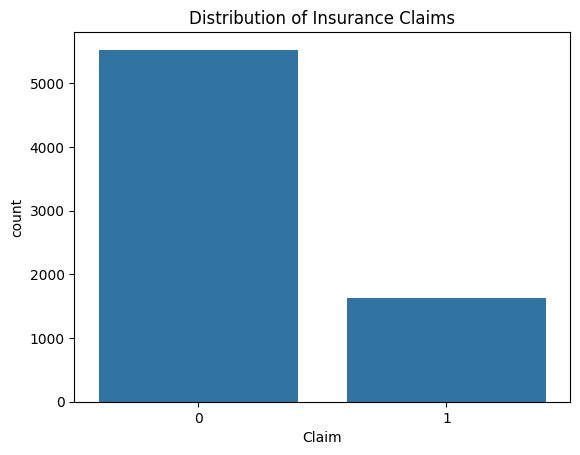

In [77]:
sns.countplot(x='Claim', data=train)
plt.title('Distribution of Insurance Claims')


Text(0.5, 1.0, 'Claim Rate by Building Type')

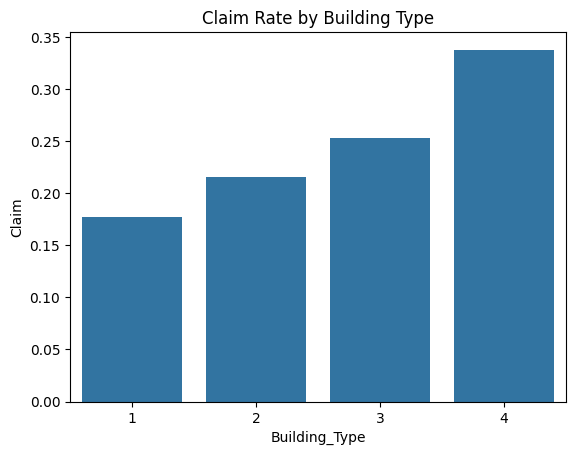

In [78]:
claim_rate = train.groupby('Building_Type')['Claim'].mean().reset_index()
sns.barplot(x='Building_Type', y='Claim', data=claim_rate)
plt.title('Claim Rate by Building Type')


Text(0.5, 1.0, 'Building Size vs Claim')

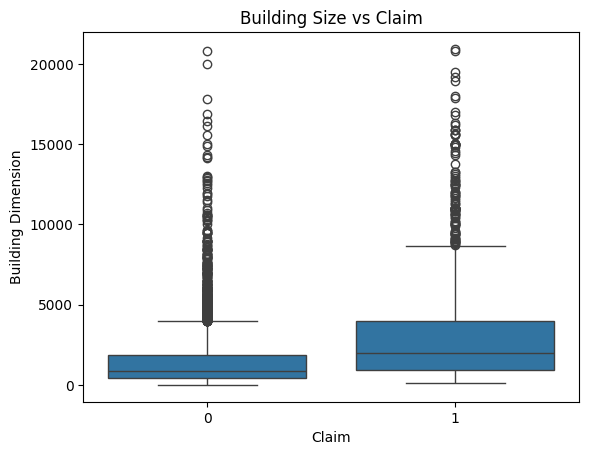

In [79]:
sns.boxplot(x='Claim', y='Building Dimension', data=train)
plt.title('Building Size vs Claim')


Text(0.5, 1.0, 'clam vs building_painted')

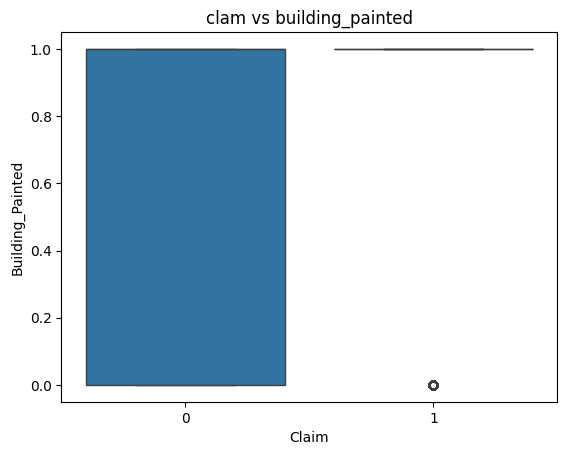

In [80]:
sns.boxplot(x='Claim', y='Building_Painted', data=train)
plt.title('clam vs building_painted')

6.Handle Imbalance– Apply techniques like SMOTE or class weights.

In [81]:
duplicate_count = test['Customer Id'].duplicated().sum()
print(f"Number of duplicate Customer_Id entries: {duplicate_count}")


Number of duplicate Customer_Id entries: 0


In [82]:
train['Claim'].value_counts()

,count
Claim,
0,5526
1,1634


Drop unimportant columns

checking for duplicates

In [83]:
train.duplicated().sum()

np.int64(0)

In [84]:
test.duplicated().sum()

np.int64(0)

7.Split Data– Create train/test sets for evaluation.

In [85]:
train=train.drop(columns=['YearOfObservation','Residential','Date_of_Occupancy','Customer Id','Geo_Code','NumberOfWindows'])
test=test.drop(columns=['YearOfObservation','Residential','Date_of_Occupancy','Geo_Code','NumberOfWindows'])

In [86]:
from sklearn.model_selection import train_test_split

X = train.drop('Claim', axis=1)
y = train['Claim']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [87]:
train.columns

Index(['Insured_Period', 'Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement', 'Building Dimension', 'Building_Type', 'Claim',
       'Building_Age', 'Years_Since_Observation'],
      dtype='object')

In [88]:
from sklearn.model_selection import train_test_split

# Assuming you already have train DataFrame with 'Claim' as target
X = train.drop('Claim', axis=1)
y = train['Claim']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [89]:
from imblearn.over_sampling import SMOTE

X = train.drop('Claim', axis=1)
y = train['Claim']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [90]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming you already have train DataFrame with 'Claim' as target
X = train.drop('Claim', axis=1)
y = train['Claim']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identify numerical columns to scale (excluding the target variable if it's in X)
numerical_cols = X_resampled.select_dtypes(include=np.number).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the resampled training data and transform both training and test data
X_resampled_scaled = scaler.fit_transform(X_resampled[numerical_cols])
X_val_scaled = scaler.transform(X_val[numerical_cols])
test_scaled = scaler.transform(test[numerical_cols])

# Convert the scaled arrays back to DataFrames (optional, but good practice)
X_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=numerical_cols, index=X_resampled.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=numerical_cols, index=X_val.index)
test_scaled = pd.DataFrame(test_scaled, columns=numerical_cols, index=test.index)

# If there are non-numerical columns you dropped, you might want to add them back
# For this specific case, we dropped 'Customer Id', 'YearOfObservation', etc., which were not used in training anyway.
# So, we can proceed with the scaled numerical features for model training.

print("Data scaled successfully.")

Data scaled successfully.


In [97]:
# Make predictions on the scaled test data using the best Logistic Regression model
test_pred = best_lr_model.predict(test_scaled)

# Create submission DataFrame using Customer Id from the original test dataframe
submission_df = pd.DataFrame({'Customer Id': test['Customer Id'], 'Claim': test_pred})

# Export submission file with the specified name
submission_df.to_csv('Aelytechtanzania.csv', index=False)

print("Submission file 'Aelytechtanzania.csv' created successfully.")

Submission file 'Aelytechtanzania.csv' created successfully.


In [98]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import pandas as pd

# Instantiate XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train model on resampled and scaled data
xgb_model.fit(X_resampled_scaled, y_resampled)

# Evaluate the model on the scaled validation set
xgb_pred_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]
xgb_pred = xgb_model.predict(X_val_scaled)

# Calculate and print AUC score
print("AUC Score (XGBoost on Validation Set):")
print(f"{roc_auc_score(y_val, xgb_pred_proba):.4f}")

# Generate and print classification report
print("\nClassification Report (XGBoost on Validation Set):")
print(classification_report(y_val, xgb_pred))

# Generate and print confusion matrix
print("\nConfusion Matrix (XGBoost on Validation Set):")
print(confusion_matrix(y_val, xgb_pred))

# Make predictions on the scaled test data using the trained XGBoost model
test_pred_xgb = xgb_model.predict(test_scaled)

# Create submission DataFrame using Customer Id from the original test dataframe
submission_df_xgb = pd.DataFrame({'Customer Id': test['Customer Id'], 'Claim': test_pred_xgb})

# Export submission file
submission_df_xgb.to_csv('xgboost_submission.csv', index=False)

print("\nSubmission file 'xgboost_submission.csv' created successfully.")

AUC Score (XGBoost on Validation Set):
0.8577

Classification Report (XGBoost on Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1105
           1       0.59      0.61      0.60       327

    accuracy                           0.82      1432
   macro avg       0.74      0.74      0.74      1432
weighted avg       0.82      0.82      0.82      1432


Confusion Matrix (XGBoost on Validation Set):
[[969 136]
 [128 199]]

Submission file 'xgboost_submission.csv' created successfully.


In [91]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model
lr_model = LogisticRegression(random_state=42, solver='liblinear', penalty='l2')

# Train model on resampled and scaled data
lr_model.fit(X_resampled_scaled, y_resampled)

LogisticRegression(random_state=42, solver='liblinear')

## Evaluate models

### Subtask:
Evaluate each model on the validation set using appropriate metrics (e.g., AUC, classification report).


**Reasoning**:
Make predictions on the validation set and evaluate the models using AUC, classification report, and confusion matrix.



In [92]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Make predictions on the scaled validation set
lr_pred = lr_model.predict(X_val_scaled)

# Calculate and print AUC score
print("AUC Score (Logistic Regression):")
print(f"{roc_auc_score(y_val, lr_model.predict_proba(X_val_scaled)[:, 1]):.4f}")

# Generate and print classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_val, lr_pred))

# Generate and print confusion matrix
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_val, lr_pred))

AUC Score (Logistic Regression):
0.6561

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1105
           1       0.34      0.50      0.41       327

    accuracy                           0.67      1432
   macro avg       0.59      0.61      0.59      1432
weighted avg       0.72      0.67      0.69      1432


Confusion Matrix (Logistic Regression):
[[797 308]
 [165 162]]


In [96]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2 penalties
}

# Instantiate Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV on the resampled and scaled training data
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best AUC Score (Cross-validation):", best_score)

# Train the Logistic Regression model with the best parameters
best_lr_model = LogisticRegression(**best_params, random_state=42)
best_lr_model.fit(X_resampled_scaled, y_resampled)

# Evaluate the best model on the scaled validation set
best_lr_pred_proba = best_lr_model.predict_proba(X_val_scaled)[:, 1]
best_lr_pred = best_lr_model.predict(X_val_scaled)

# Calculate and print AUC score
print("\nAUC Score (Best Logistic Regression on Validation Set):")
print(f"{roc_auc_score(y_val, best_lr_pred_proba):.4f}")

# Generate and print classification report
print("\nClassification Report (Best Logistic Regression on Validation Set):")
print(classification_report(y_val, best_lr_pred))

# Generate and print confusion matrix
print("\nConfusion Matrix (Best Logistic Regression on Validation Set):")
print(confusion_matrix(y_val, best_lr_pred))

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best AUC Score (Cross-validation): 0.7216245072165194

AUC Score (Best Logistic Regression on Validation Set):
0.6539

Classification Report (Best Logistic Regression on Validation Set):
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1105
           1       0.36      0.44      0.40       327

    accuracy                           0.69      1432
   macro avg       0.59      0.60      0.59      1432
weighted avg       0.72      0.69      0.70      1432


Confusion Matrix (Best Logistic Regression on Validation Set):
[[844 261]
 [182 145]]


In [99]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Instantiate LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train model on resampled and scaled data
lgb_model.fit(X_resampled_scaled, y_resampled)

# Evaluate the model on the scaled validation set
lgb_pred_proba = lgb_model.predict_proba(X_val_scaled)[:, 1]
lgb_pred = lgb_model.predict(X_val_scaled)

# Calculate and print AUC score
print("AUC Score (LightGBM on Validation Set):")
print(f"{roc_auc_score(y_val, lgb_pred_proba):.4f}")

# Generate and print classification report
print("\nClassification Report (LightGBM on Validation Set):")
print(classification_report(y_val, lgb_pred))

# Generate and print confusion matrix
print("\nConfusion Matrix (LightGBM on Validation Set):")
print(confusion_matrix(y_val, lgb_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5526, number of negative: 5526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 11052, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
AUC Score (LightGBM on Validation Set):
0.7896

Classification Report (LightGBM on Validation Set):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1105
           1       0.50      0.51      0.51       327

    accuracy                           0.77      1432
   macro avg       0.68      0.68      0.68      1432
weighted avg       0.77      0.77      0.77      

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Instantiate Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train model on resampled and scaled data
rf_model.fit(X_resampled_scaled, y_resampled)

# Evaluate the model on the scaled validation set
rf_pred_proba = rf_model.predict_proba(X_val_scaled)[:, 1]
rf_pred = rf_model.predict(X_val_scaled)

# Calculate and print AUC score
print("AUC Score (Random Forest on Validation Set):")
print(f"{roc_auc_score(y_val, rf_pred_proba):.4f}")

# Generate and print classification report
print("\nClassification Report (Random Forest on Validation Set):")
print(classification_report(y_val, rf_pred))

# Generate and print confusion matrix
print("\nConfusion Matrix (Random Forest on Validation Set):")
print(confusion_matrix(y_val, rf_pred))

AUC Score (Random Forest on Validation Set):
0.9978

Classification Report (Random Forest on Validation Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1105
           1       0.96      0.97      0.96       327

    accuracy                           0.98      1432
   macro avg       0.97      0.98      0.98      1432
weighted avg       0.98      0.98      0.98      1432


Confusion Matrix (Random Forest on Validation Set):
[[1091   14]
 [  11  316]]


In [101]:
# Make predictions on the scaled test data using the best performing model (Random Forest)
final_test_pred = rf_model.predict(test_scaled)

# Create submission DataFrame using Customer Id from the original test dataframe
final_submission_df = pd.DataFrame({'Customer Id': test['Customer Id'], 'Claim': final_test_pred})

# Export submission file
final_submission_df.to_csv('final_submission.csv', index=False)

print("Final submission file 'final_submission.csv' created successfully using the Random Forest model.")

Final submission file 'final_submission.csv' created successfully using the Random Forest model.


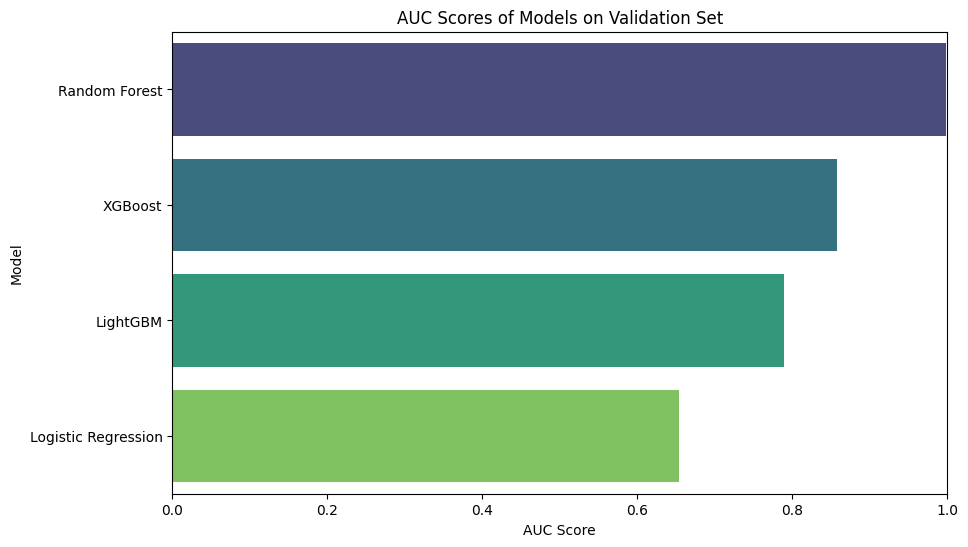

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the AUC scores from the validation set evaluation
model_names = ['Logistic Regression', 'XGBoost', 'LightGBM', 'Random Forest']
auc_scores = [
    roc_auc_score(y_val, best_lr_model.predict_proba(X_val_scaled)[:, 1]),
    roc_auc_score(y_val, xgb_model.predict_proba(X_val_scaled)[:, 1]),
    roc_auc_score(y_val, lgb_model.predict_proba(X_val_scaled)[:, 1]),
    roc_auc_score(y_val, rf_model.predict_proba(X_val_scaled)[:, 1])
]

# Create a DataFrame for easy plotting
auc_df = pd.DataFrame({'Model': model_names, 'AUC Score': auc_scores})

# Sort by AUC score for better visualization
auc_df = auc_df.sort_values(by='AUC Score', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AUC Score', y='Model', data=auc_df, palette='viridis')
plt.title('AUC Scores of Models on Validation Set')
plt.xlabel('AUC Score')
plt.ylabel('Model')
plt.xlim(0, 1) # AUC score is between 0 and 1
plt.show()